### Exploratory Data Analysis on Spotify Songs
Dataset: my_2022_playlist.csv

Spotify API: https://developer.spotify.com/documentation/web-api/reference/get-audio-features

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


In [167]:
sns.set_style("white")

#### Load Dataset

In [168]:
data = pd.read_csv("./my_2022_playlist.csv")
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target,song_title,artist
0,0.696,0.859,0,-4.795,1,0.1120,0.15700,0.000000,0.162,0.702,87.973,186546,4,0,GAP,Haha
1,0.558,0.454,6,-5.335,1,0.0551,0.49900,0.000000,0.146,0.424,113.120,158594,4,0,Here's Your Perfect,Jamie Miller
2,0.598,0.888,4,-5.119,1,0.0807,0.00947,0.000000,0.347,0.482,103.966,187133,4,0,Talk Too Much,COIN
3,0.730,0.668,10,-5.869,1,0.0922,0.51800,0.000247,0.237,0.543,115.960,220107,4,0,These Walls,Sam Kim
4,0.644,0.757,0,-4.773,1,0.0367,0.16600,0.000000,0.943,0.501,112.056,189360,4,1,Let the Good Times Roll,Ben Rector


#### Cleaning Data

In [169]:
data.isna().sum()   # To check for missing values

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
target              0
song_title          0
artist              0
dtype: int64

In [170]:
data.info()     # To better understand the data such as its data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      156 non-null    float64
 1   energy            156 non-null    float64
 2   key               156 non-null    int64  
 3   loudness          156 non-null    float64
 4   mode              156 non-null    int64  
 5   speechiness       156 non-null    float64
 6   acousticness      156 non-null    float64
 7   instrumentalness  156 non-null    float64
 8   liveness          156 non-null    float64
 9   valence           156 non-null    float64
 10  tempo             156 non-null    float64
 11  duration_ms       156 non-null    int64  
 12  time_signature    156 non-null    int64  
 13  target            156 non-null    int64  
 14  song_title        156 non-null    object 
 15  artist            156 non-null    object 
dtypes: float64(9), int64(5), object(2)
memory us

In [171]:
data.describe() # Summary statistics of the data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.00000
mean,0.630321,0.540051,5.673077,-7.838295,0.692308,0.055504,0.384267,0.024947,0.183873,0.531858,116.097013,210534.269231,3.846154,0.50000
std,0.139927,0.206100,3.402397,2.730805,0.463025,0.038382,0.297067,0.098076,0.154936,0.227530,25.853661,40545.084024,0.509951,0.50161
min,0.217000,0.104000,0.000000,-20.510000,0.000000,0.025900,0.000244,0.000000,0.032600,0.042800,62.984000,125747.000000,1.000000,0.00000
25%,0.531500,0.372250,3.000000,-9.218500,0.000000,0.032575,0.088575,0.000000,0.101750,0.340750,96.057750,181596.000000,4.000000,0.00000
50%,0.636500,0.536500,6.000000,-7.367000,1.000000,0.042400,0.366000,0.000007,0.124000,0.530000,113.232500,207841.500000,4.000000,0.50000
75%,0.729250,0.710750,9.000000,-5.889250,1.000000,0.063100,0.641500,0.000359,0.207750,0.715250,130.990500,229226.500000,4.000000,1.00000
max,0.927000,0.978000,11.000000,-2.779000,1.000000,0.288000,0.959000,0.804000,0.977000,0.967000,196.780000,364333.000000,5.000000,1.00000


 ### Data Analysis

#### Top 10 Most Popular Artists

In [172]:
top_five_artists = data.groupby("artist").count().sort_values(by ='song_title', ascending =False)["song_title"][:10]
# We first group the data by artist name
# Count the number of songs for each artist
# Sort values from highest number of songs to lowest number of songs
# Slice the array to reflect only the top 5
top_five_artists

artist
Charlie Burg         5
Rex Orange County    5
Harry Styles         5
The 1975             4
PREP                 3
Micah Edwards        3
HYBS                 3
COIN                 3
lullaboy             3
Oh Wonder            3
Name: song_title, dtype: int64

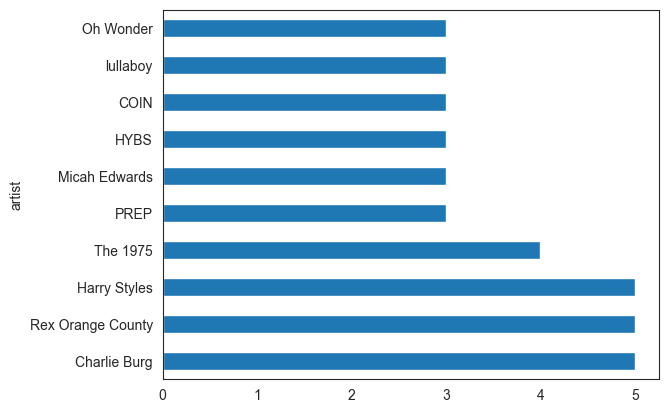

In [173]:
# Bar Chart to show top 5 artists
top_five_artists.plot.barh()
plt.show()

#### Top 5 Loudest Tracks

In [174]:
top_five_loudest = data[['song_title','artist', 'loudness']].sort_values(by = 'loudness', ascending=False)[:5]
# First choose the columns 'song_title', 'artist', 'loudness'
# Sort values by loudness , ascending = False as 0 = loudest, -60 = softest
top_five_loudest

,song_title,artist,loudness
88,Chit Chat,Beach Weather,-2.779
10,Dandelions,Ruth B.,-2.958
106,Jet Lag (feat. Natasha Bedingfield),"Simple Plan, Natasha Bedingfield",-3.453
39,parachute,John K,-3.777
112,Kids,MGMT,-3.871


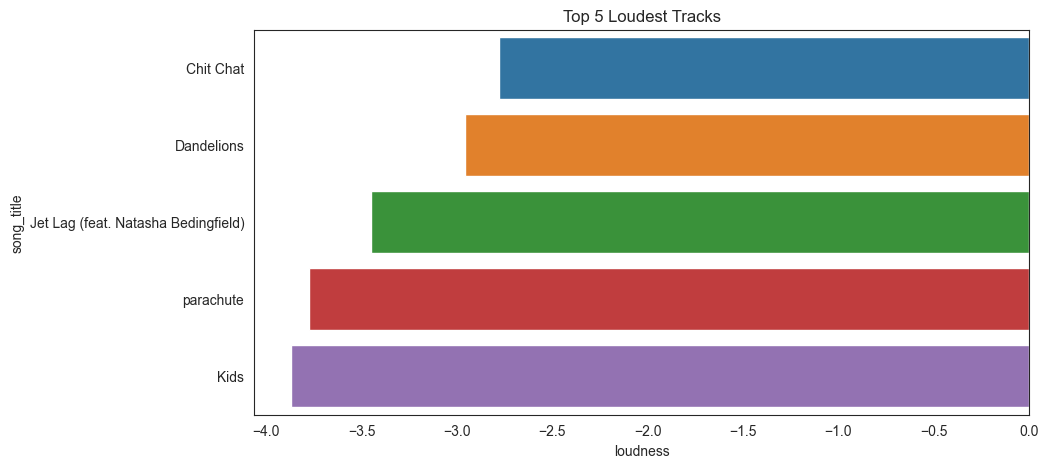

In [175]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'loudness', y='song_title', data=top_five_loudest)
plt.title("Top 5 Loudest Tracks")
plt.show()

#### Artist with Highest Danceability Song

In [176]:
artist_highest_danceability = data[['song_title','artist', 'danceability']].sort_values(by = 'danceability', ascending=False)[:1]
artist_highest_danceability


,song_title,artist,danceability
12,Disco Yes,"Tom Misch, Poppy Ajudha",0.927


#### Top 10 Instrumentals

In [177]:
top_ten_instrumentals = data[['song_title', 'artist', 'instrumentalness']].sort_values(by = 'instrumentalness', ascending=False)[:10]
top_ten_instrumentals

,song_title,artist,instrumentalness
124,About You,The 1975,0.804
40,"Hello, Anxiety",Phum Viphurit,0.552
76,Show Me How,Men I Trust,0.534
71,Honey,Vacations,0.311
129,Sweet Disposition,The Temper Trap,0.252
145,Call You,babychair,0.236
88,Chit Chat,Beach Weather,0.168
137,Metamodernity,Vansire,0.165
113,golden hour,JVKE,0.162
153,the perfect pair,beabadoobee,0.124


#### Most Common Durations

In [178]:
def convert_to_minutes_seconds(milliseconds):
    seconds = round(milliseconds * 10 ** -3)
    minutes, seconds = divmod(seconds, 60)
    return f"{minutes:02d}:{seconds:02d}"


data['duration'] = data['duration_ms'].apply(convert_to_minutes_seconds)
most_common_durations = data.groupby('duration').count().sort_values(by = 'song_title', ascending = False)['song_title'][:10]
most_common_durations

duration
03:47    4
03:07    4
03:41    4
04:04    4
03:24    4
03:05    3
03:02    3
04:23    3
02:58    3
03:19    3
Name: song_title, dtype: int64

#### Plots for Audio Features

In [179]:
feature_cols = ['acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo','valence']

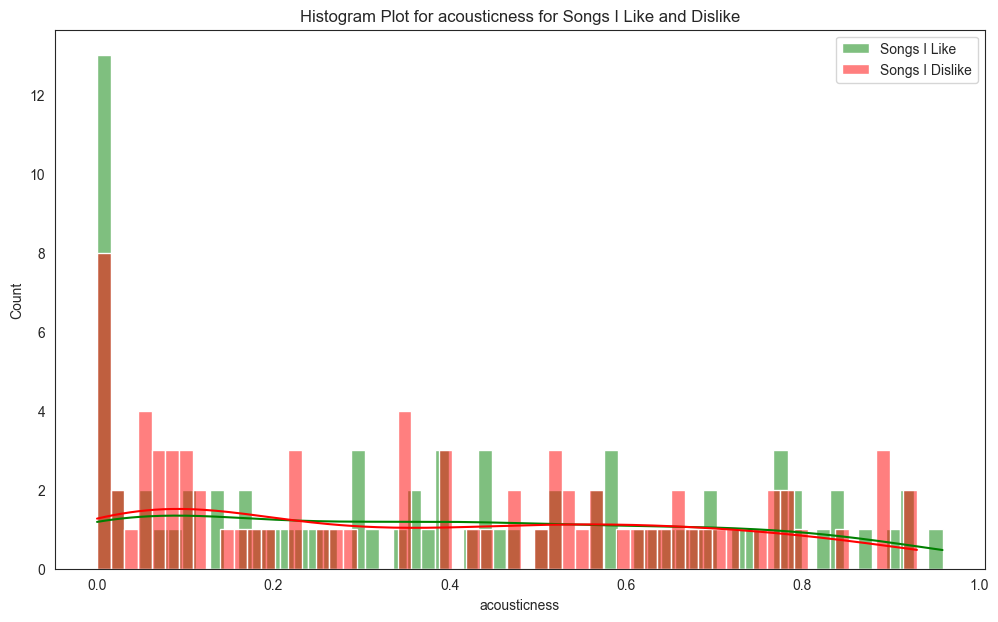

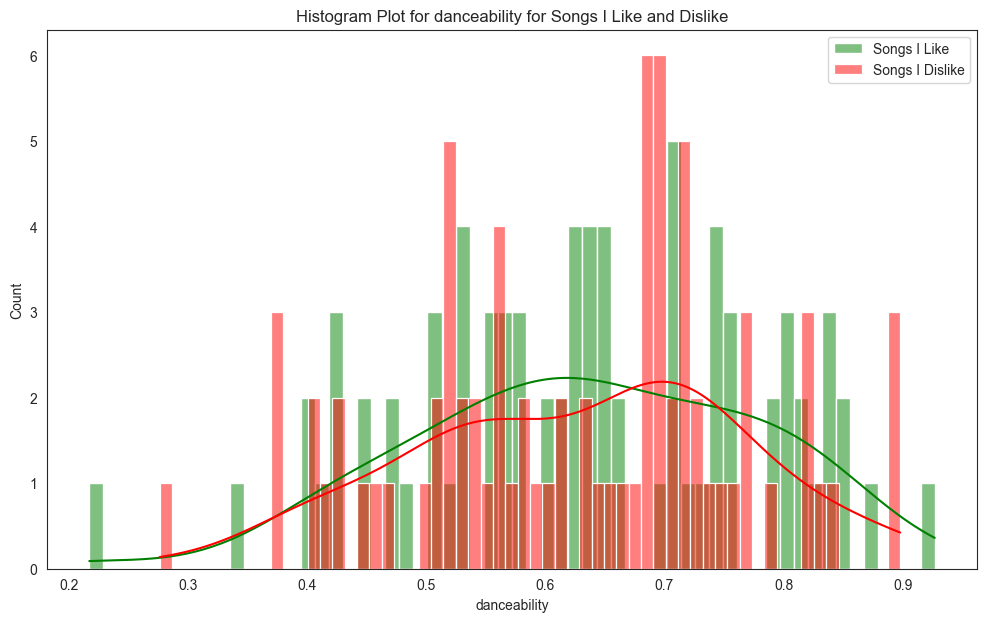

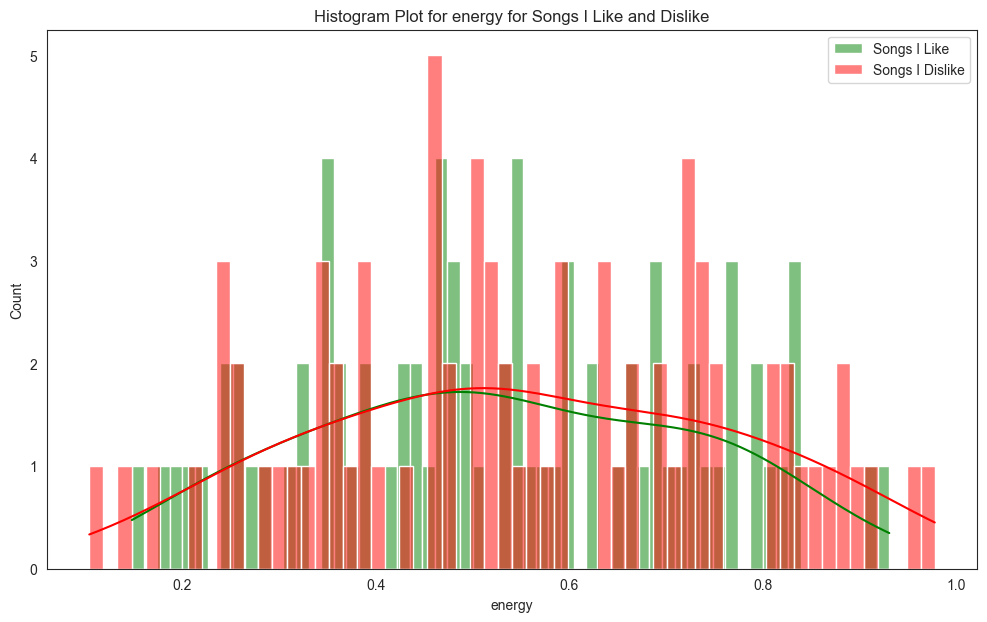

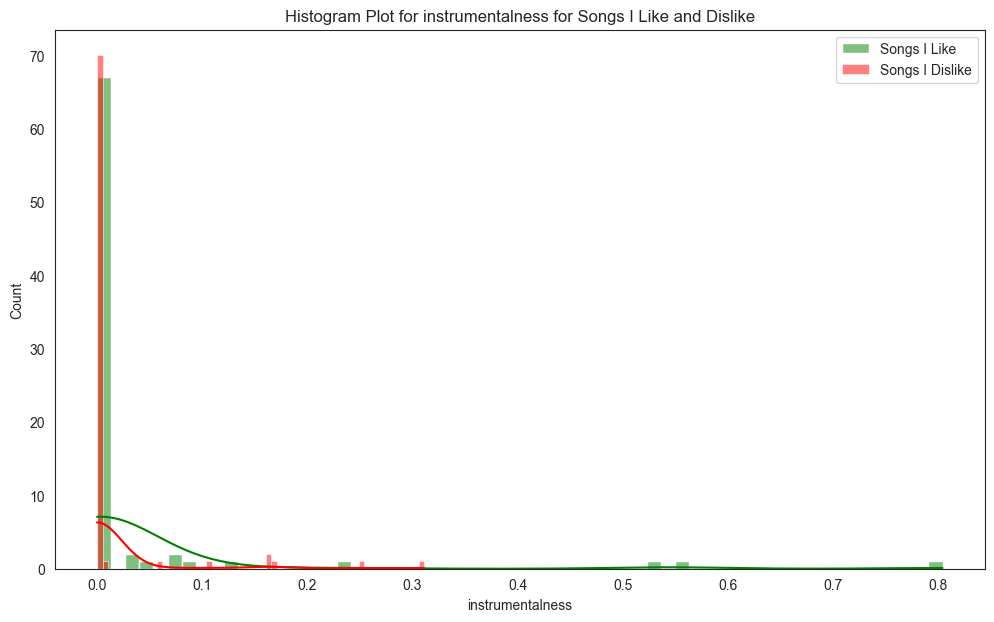

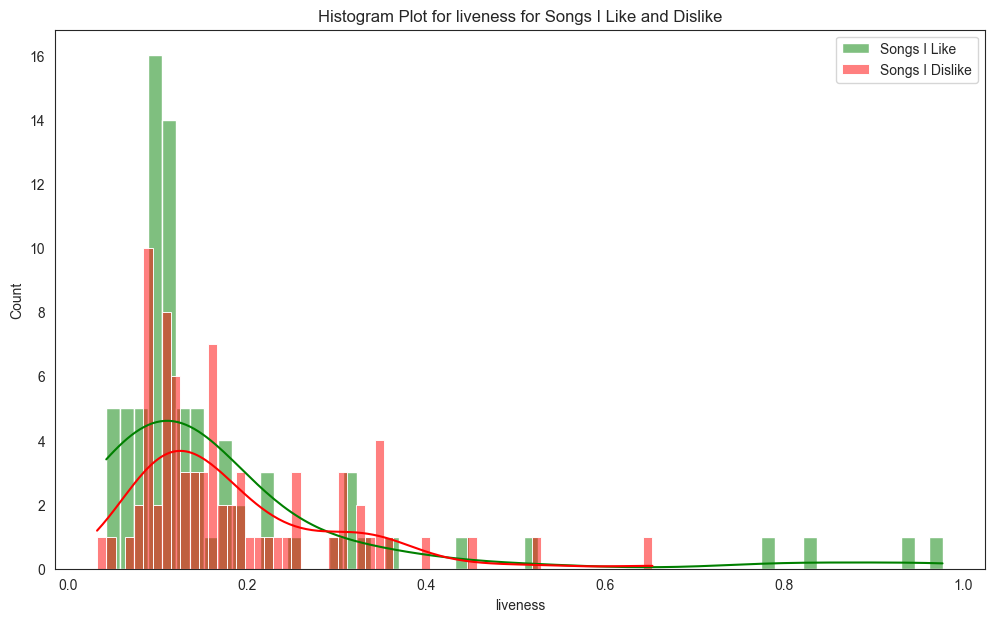

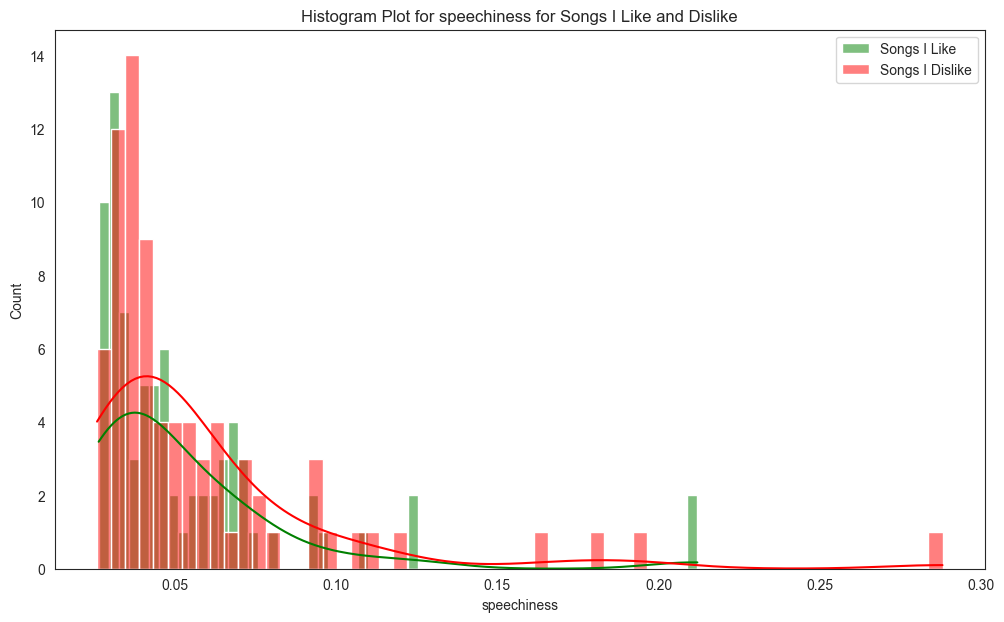

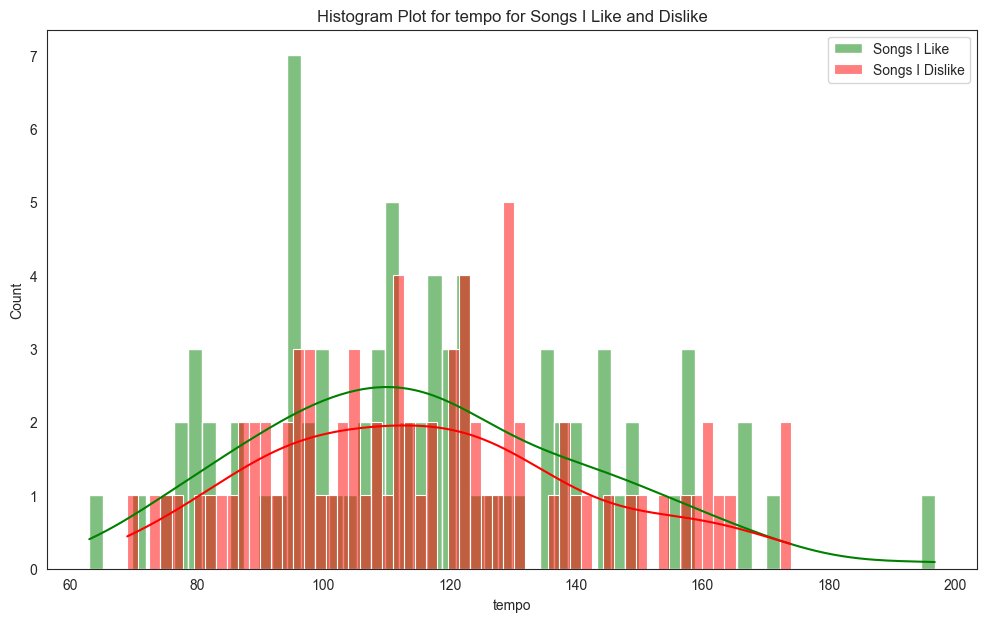

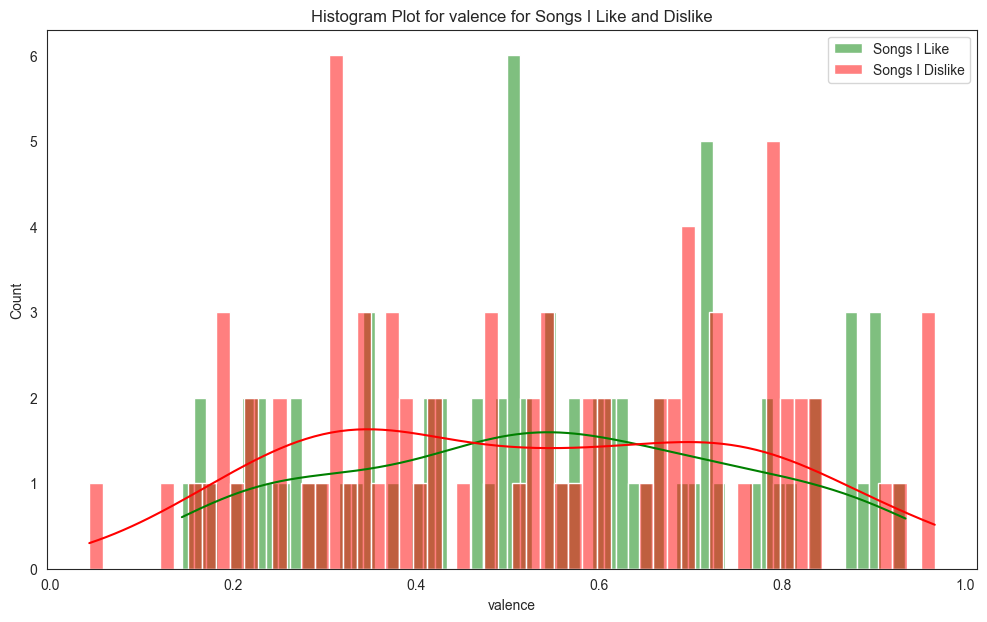

In [183]:
for c in feature_cols:
    like_data = data[data["target"] == 1][c]   # target = 1 indicates that I like the song
    dislike_data = data[data["target"] == 0][c] # target = 0 indicates I dislike the song

    plt.figure(figsize=(12,7))

    sns.histplot(like_data, bins=60, label="Songs I Like", color = 'green', kde = True)
    sns.histplot(dislike_data, bins = 60, label="Songs I Dislike", color = 'red', kde=True)

    plt.legend(loc = 'upper right')
    plt.title(f"Histogram Plot for {c} for Songs I Like and Dislike")
    plt.show()
